In [ ]:
# Bei diesem Code kommt ein Fehler, der Datensatz steht nicht mehr über scikit-learn zur Verfügung
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
# Der Datensatz wird manuell heruntergeladen, wie in der Fehlermeldung beschrieben
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

Next, we can apply models!

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

#from sklearn.datasets import load_boston
#X, y = load_boston(return_X_y=True)
X = data
y = target

mod = LinearRegression()
mod.fit(X, y)
mod.predict(X)[:3]

array([30.00384338, 25.02556238, 30.56759672])

In [ ]:
mod = KNeighborsRegressor()
mod.fit(X, y)
mod.predict(X)[:3]

array([21.78, 22.9 , 25.36])

Maybe we should inspect the results.

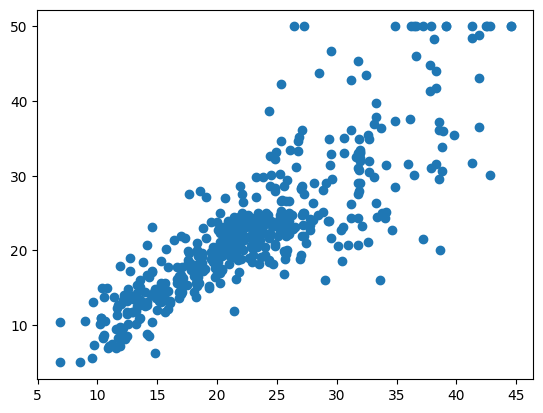

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pylab as plt

mod = KNeighborsRegressor().fit(X, y)
pred = mod.predict(X)
plt.scatter(pred, y)

Let's put everything into a pipeline.

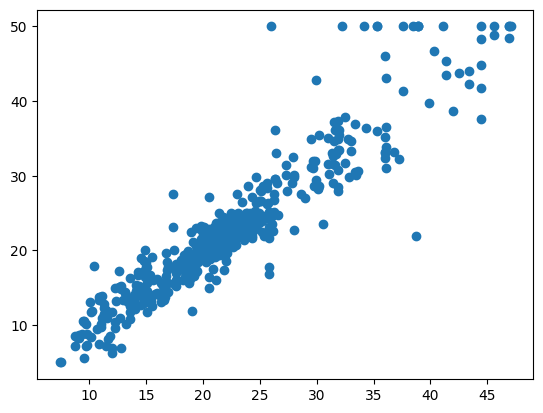

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's also apply some settings!

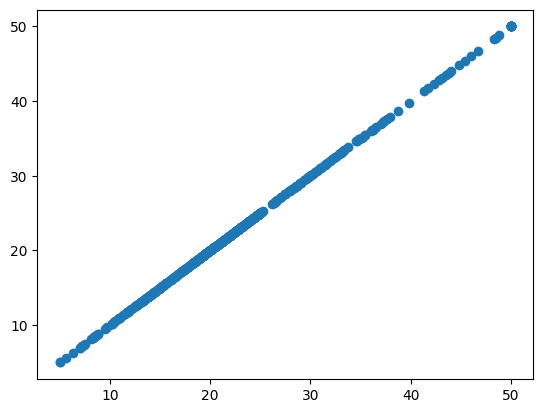

In [ ]:


# If n_neighbors = 1, we're totally cheating with the chart below.
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's now use a gridsearch!

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

mod = GridSearchCV(estimator=pipe,
                 param_grid={
                   'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                 },
                 cv=3)
mod.fit(X, y);

In [ ]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002420,0.000565,0.002666,0.000187,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001874,0.000034,0.002625,0.000223,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001835,0.000032,0.002775,0.000325,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001855,0.000025,0.002720,0.000124,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001940,0.000085,0.002777,0.000148,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.001927,0.000172,0.002773,0.000160,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001848,0.000052,0.002879,0.000142,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001814,0.000021,0.003095,0.000265,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.001816,0.000043,0.002840,0.000169,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.001842,0.000068,0.003154,0.000214,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


Finally, lets remember that we should look at the data.

In [ ]:
# Das funktioniert nicht mehr, da wir den Datensatz anders geladen haben und dieser nicht mehr in scikit-learn integriert ist (siehe oben)
print(load_boston()['DESCR'])

NameError: name 'load_boston' is not defined